In [40]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

## Prepare dataset

In [31]:
df = pd.read_csv('data.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df_numbers = df.copy().select_dtypes(include=['int64', 'float64'])

null_values = df_numbers.isnull().any(axis=1)
df.drop(df_numbers[null_values].index, axis=0, inplace=True)
df_numbers.drop(df_numbers[null_values].index, axis=0, inplace=True)


target = df['Value']
target = target.str.replace('€', '')
target = (target.replace(r'[KM]+$', '', regex=True).astype(float) * \
          target.str.extract(r'[\d\.]+([KM]+)', expand=False)
          .fillna(1)
          .replace(['K','M'], [10**3, 10**6]).astype(int))

## KNN Regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_numbers, target, random_state=0)
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

train_score = knnreg.score(X_train, y_train)
test_score = knnreg.score(X_test, y_test)

print('R squared train set score: {}'.format(train_score))
print('R squred test set score: {}'.format(test_score))

Train set score: 0.8759929641421541
Test set score: 0.753184951369864


## Plot 10 random players prediction and actual prices

<IPython.core.display.Javascript object>


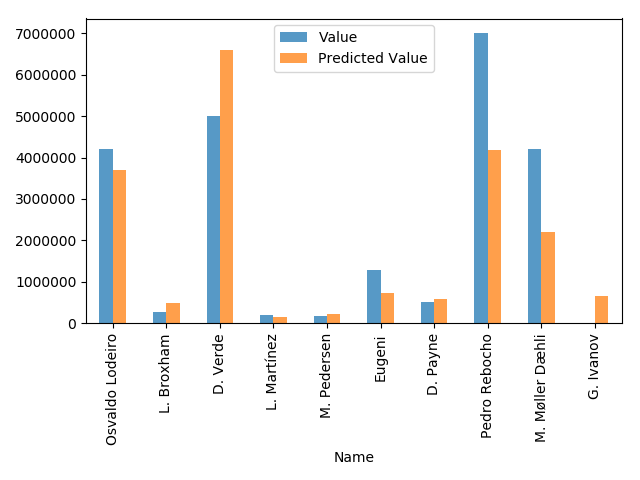

In [82]:
sample_players = df_numbers.sample(10, random_state=1)
actual_values = target.loc[sample_players.index]
pred_values = knnreg.predict(sample_players)

_df = df.loc[sample_players.index]
_df = _df[['Name']]
_df['Value'] = actual_values
_df['Predicted Value'] = pred_values

ax = _df.plot(kind='bar', x='Name', alpha=0.75)
plt.gcf().tight_layout()